### <font color='#f7f'> [0] <u>Initialization</u> </font>

In [226]:
# remove residues from notebook
!rm -rf sample_data

# get the zip containing the cat images
!wget https://github.com/Crash285github/nyaural_catwork/raw/main/data/cats.zip -P data/

# extract the cats into data/
from zipfile import ZipFile
with ZipFile('data/cats.zip', 'r') as cats:
  cats.extractall('data')

# remove the downloaded zip
!rm data/cats.zip

'rm' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


### <font color='#f77'>[1] <u>Data manipulation</u> </font>

#### <font color='#777'> [1.0] Imports</font>

In [227]:
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as tforms
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### <font color='#f74'> [1.1] Dataset class</font> 

In [228]:
class CatDataset(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        self.total_imgs = os.listdir(main_dir)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        image = Image.open(img_loc).convert('RGB')
        
        # we permute: (3, 64, 64) --> (64, 64, 3), this way matplotlib can show it
        tensor_image = self.transform(image).permute(1,2,0)
        return tensor_image

#### <font color='#f74'>[1.2] Dataset details</font>

In [229]:
# image transformations
transforms = tforms.Compose([
  tforms.ToTensor(),
  tforms.Grayscale()
])

# dataset divisions (you can change these)
train_frac, val_frac, test_frac = 7, 2, 1

# normalize divisions
n_train_frac = train_frac / (train_frac + val_frac + test_frac)
n_val_frac = val_frac / (train_frac + val_frac + test_frac)
n_test_frac = test_frac / (train_frac + val_frac + test_frac)

print(f'{(n_train_frac*100):.1f} % Training data')
print(f'{(n_val_frac*100):.1f} % Validation data')
print(f'{(n_test_frac*100):.1f} % Testing data')

70.0 % Training data
20.0 % Validation data
10.0 % Testing data


#### <font color='#f74'>[1.3] Create Datasets</font>

In [230]:
# create Dataset
dataset = CatDataset('data', transforms)

# split Dataset
train_dataset, val_dataset, test_dataset = random_split(dataset, [n_train_frac, n_val_frac, n_test_frac])

print(f'{len(train_dataset)}\ttraining images')
print(f'{len(val_dataset)}\tvalidating images')
print(f'{len(test_dataset)}\ttesting images')

11025	training images
3150	validating images
1574	testing images


##### <font color='#777'>[1.3.1] Visualize Datasets </font>

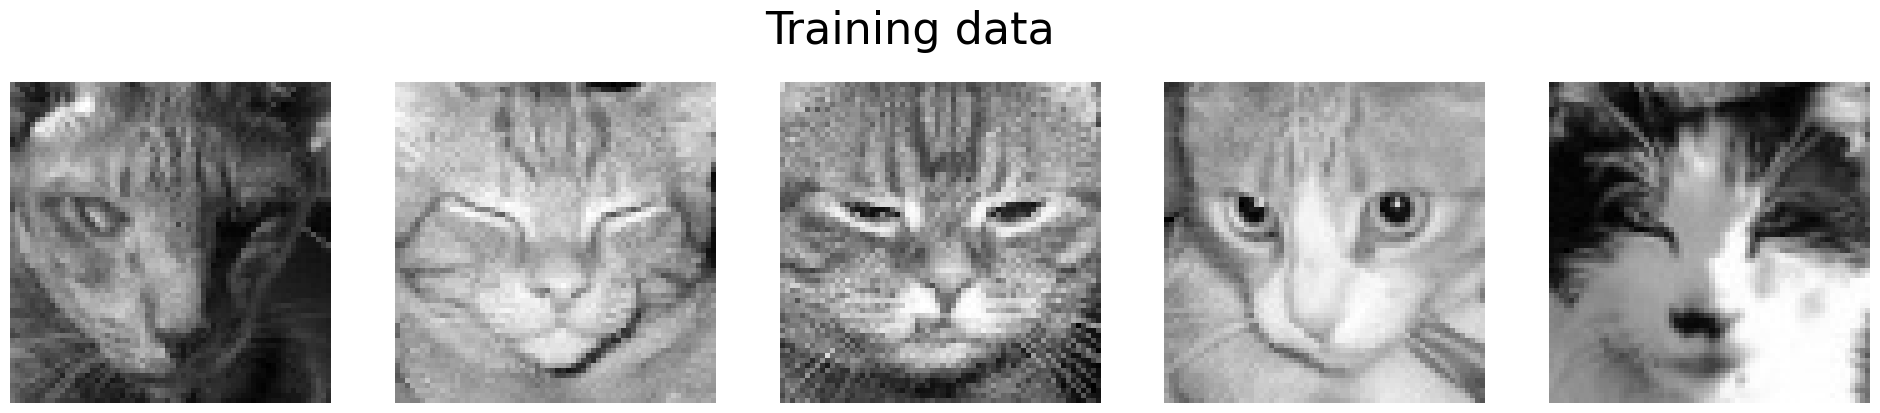

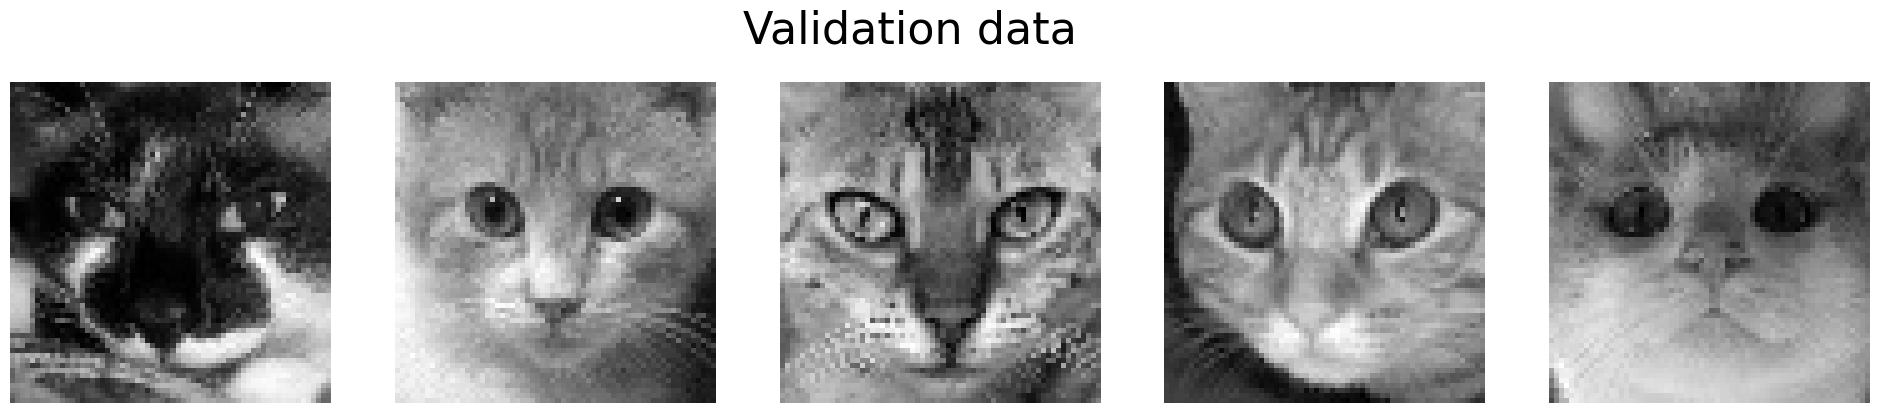

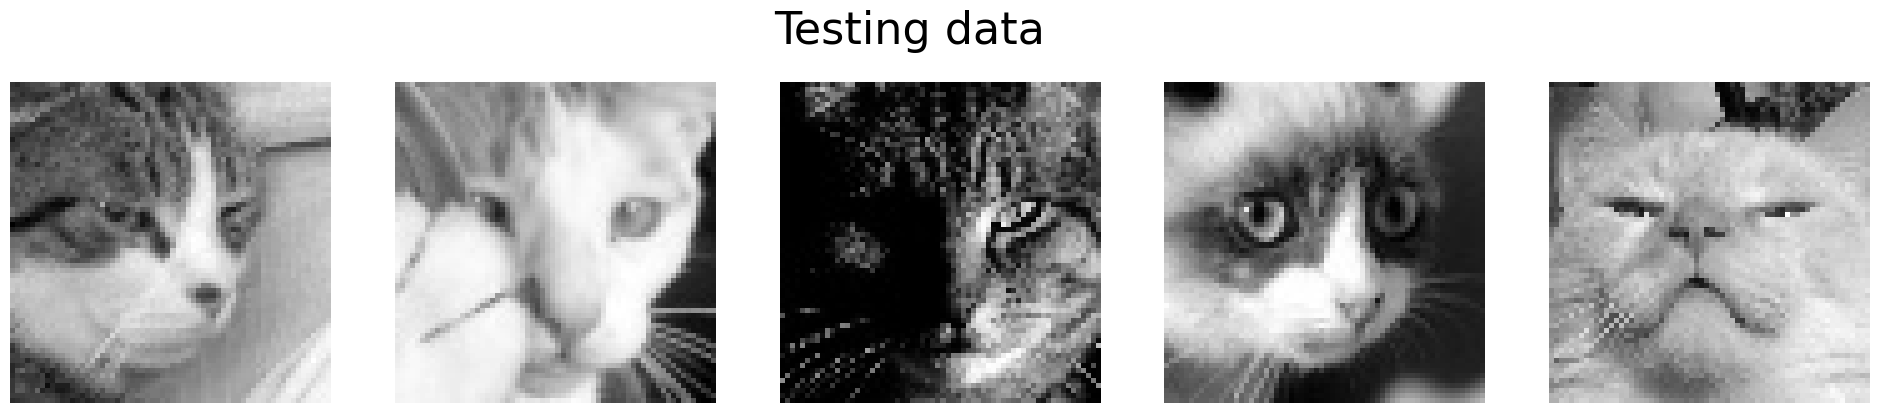

In [231]:
# you can change this
number_of_samples = 5

def make_plt(dataset, title):
   fig, _ = plt.subplots(1, number_of_samples)
   fig.set_figwidth(24)
   fig.suptitle(title, fontsize=32)

   selected = np.random.choice(len(dataset), number_of_samples, False)
   for i, ind in enumerate(selected):
      plt.subplot(1, number_of_samples, i+1)
      plt.imshow(dataset[ind], cmap='gray')
      plt.axis('off')


# training
make_plt(train_dataset, "Training data")

# validation
make_plt(val_dataset, "Validation data")
   
# testing
make_plt(test_dataset, "Testing data")


#### <font color='#f74'>[1.4] Create DataLoaders </font>

In [233]:
# training loader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# validation loader
val_dataloader = DataLoader(val_dataset, batch_size=4, shuffle=True)

# testing loader
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=True)

### <font color='#7f7'>[2] <u>Define AutoEncoders</u> </font>

#### <font color='#777'> [2.0] Imports</font>

In [ ]:
import torch.nn as nn

#### <font color='#4f7'> [2.1] Dense AutoEncoder Class</font>

In [ ]:
class DenseAutoEncoder(nn.Module):
  def __init__(self, input_size, hidden_size, learning_rate):
    pass
  
  def forward(self, x):
    pass

#### <font color='#4f7'> [2.2] Sparse AutoEncoder Class</font>

In [ ]:
class SparseAutoEncoder(nn.Module):
  def __init__(self, input_size, hidden_size, learning_rate):
    pass
  
  def forward(self, x):
    pass